# Linear Regression I

Learning outcomes:

  - Basic linear regression concepts
  - Implement model fit using matplotlib
  - Compute Sum of Squared Errors
  - Model fit quality 
  - Overfitting


---

## Linear regression is a fundamental concept in statistics and machine learning. 

Linear regression is used to model the relationship between a dependent variable and one or more independent variables. It assumes that there is a linear relationship between the independent variable(s) and the dependent variable. The goal of linear regression is to find the best-fit line that minimizes the difference between the predicted values and the actual values.

Linear regression is important because it can help us to understand and predict the relationship between two or more variables. It is widely used in many fields such as economics, finance, engineering, and social sciences. For example, in finance, linear regression can be used to predict stock prices based on economic indicators. In engineering, it can be used to predict the strength of materials based on their composition. In social sciences, it can be used to understand the relationship between poverty and crime rates.

> Importantly, the term **linear** in linear regression does not refer only to a  straight line, but it applies to any polynomial! Linear here is referred to the parameters of the model and not the model *per se*!

Indeed, when we fit a regression model using linear regression, we are trying to find the set of parameters of a function that best represents the relationship between the independent variable(s) (say `x`) and the dependent variable (say `y`). 

The amount of variation in the dependent variable that can be explained by the independent variable(s) is determined by the fit of the regression line to the data points.

A generalized equation for linear regression is the following:

$Y=\alpha+\beta*X+\epsilon$

Where $X$ and $Y$ are arrays containing the data points, $\alpha$ and $\beta$ parameters of the regression model. 

The last term $\epsilon$ is called error but it is not a mistake, it is the randomness in the universe that we are never going to capture. The whole goal of linear regression, and any modelling in general, is to capture the data and disregard the noise. See the forest and without focusing too much on the trees.

The simplest form of this general linear regression model is a line. Below we wills tart with a line to demonstrate how we can fit via linear regression using only `NumPy` and then we will dig a little bit deeper.

--- 
### A simple linear regression

In Python, we can perform linear regression simply using the `numpy` and `matplotlib` libraries (or using more advanced libraries such as  `scikit-learn` or `statsmodels`, we will focus on the simpler cases here). 

Below an example of how to do use `numpy`'s functions `polyfit` and `polyval` for fit and evaluate a libear regression model. 

First, we will import the required libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Next, we need to create some sample data to work with. Let's say we want to establish a relationship between the number of hours studied and the grades obtained by students. We can create a `NumPy` array with some random data like this:


In [2]:
x = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
y = np.array([60, 80, 90, 92, 94, 94, 96, 98, 98, 100])

Here, we've created two `NumPy` arrays: 

  - `x`, which contains the number of hours studied, and 
  - `y`, which contains the corresponding grades obtained by the students.

Now, we will calculate the slope and intercept of a straight line fit to the data using `NumPy`'s `polyfit()` function:

In [3]:
#slope, intercept = np.polyfit(x, y, 1)
coeff = np.polyfit(x, y, deg=1)

The above calculated the `slope` and `intercept` of the linear regression line. The first entry in `coeff` is the `slope`, the second the `intercept`:

In [4]:
# The first coefficient is the slope of the line
# The second coefficient is the intercept
slope = coeff[0]
intercept = coeff[1]

We can now plot our data and the linear regression line to visualize the relationship between the two variables. 

The function `polyval` can be used to plot evaluate the results of `polyfit`. The function takes as input the entire array returned by `polyfit` and the `x` values and returns the predicted `y` values, we will call these last, `y_hat`. 

So for each `y` data point there will be a corresponding `y_hat` predicted by the straight line: 

In [5]:
# Fit a linear regression model
y_hat = np.polyval(coeff, x)

We can now plot the results and the original data:

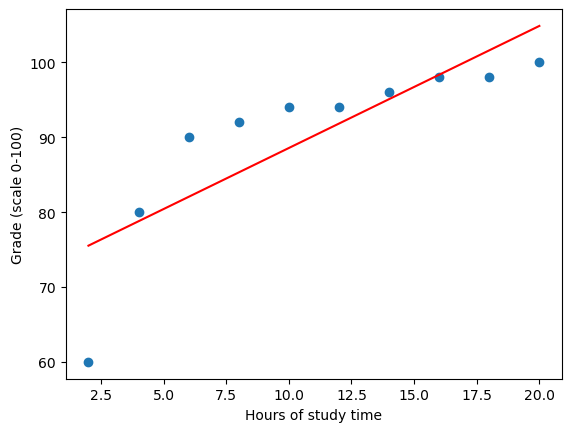

In [6]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='red')
plt.ylabel('Grade (scale 0-100)')
plt.xlabel('Hours of study time')
plt.show()

The above is a scatter plot of our data points and plot the linear regression line through them. This is the equation of the line we just fitted:

 $\hat{y} = slope*x + intercept$

The red line, is our **model** the best fitting line to the data. 

To determine the best fitting line `polyfit` has adjusted the intercept and slope of a line so as to minimize the distance between the model and the data.

We can see what it is going on here. For each data point the line returned by `polyfit` has a predicted `y_hat` point (that is the normal way we call predicted points `y_hat`

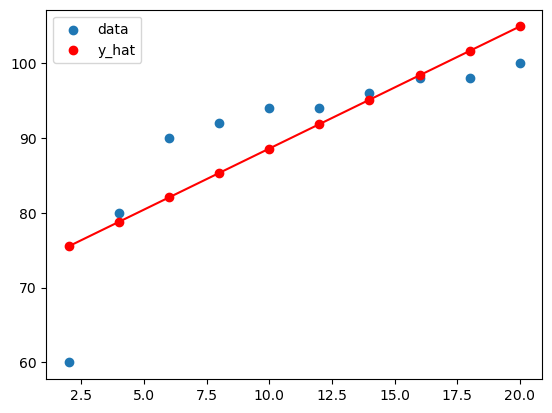

In [7]:
# Plot the data and the fit
plt.scatter(x, y, label='data')
plt.scatter(x, y_hat, label='y_hat', color='red')
plt.plot(x,y_hat, color='red')
plt.legend()
plt.show()

To fit the line `polyfit` had to find the `intercept` and `slope` that minimized the distance between the data point (blue dots) and the corresponding location on the line (red dots). 

The final values of `slope` and `intercept` were `11.631` and `72.3`, correspondingly in our case.

To find these points `polyfit` computed the *sum-of-the-squared-error* (SSE) between the data (`y`) and the corresponding points on the line. 

The distance between the Y_hat and the Y we call it error ($\epsilon$). We call it error because we hope it is random variation that we do not need to capture. So if the fit is good the overall error should be as small as possible. 

Next, let's compute the error at each datapoint. This is the difference between `y` (the data to be predicted) and `y_hat` (the prediction from the model).

In [8]:
# Take a look at the numbers
print(y-y_hat)

[-15.52727273   1.21212121   7.95151515   6.69090909   5.43030303
   2.16969697   0.90909091  -0.35151515  -3.61212121  -4.87272727]


Now, as we discussed above to fit the model `polyfit` had to minimize these numbers. One way to do so is to sum all of them together and minimize the total sum of errors. 

So let's take a look at the total sum of errors:

In [9]:
# The sum of errors is small
print(sum(y-y_hat))

1.1368683772161603e-13


Mhm, that is a very small number. Good I guess, but it seems too small given that the blue dots and red dots are far away from each other, and the errors above show that. What is going on here?

The reason the sum is small is because the negative errors and the positive errors for each individual datapoint tend to cancel each others out. 

A better measure of fit of a model to data to use during linear regression, the one commonly used when fitting or evaluating models is the the sum of squared errors or SSE.

Let's first compute the individual squared errors:

In [10]:
print((y-y_hat)**2)

[2.41096198e+02 1.46923783e+00 6.32265932e+01 4.47682645e+01
 2.94881910e+01 4.70758494e+00 8.26446281e-01 1.23562902e-01
 1.30474197e+01 2.37434711e+01]


Ok, bigger numbers, all positive this time. That is important. 

Next, let's take the sum:

In [11]:
# The sum of square is big 

print(sum((y-y_hat)**2))

422.4969696969698


Now, that is a bigger number. The sum of all positive numbers returned a big number, better...

So, as a summary so far, we have learned about:
- linear regression and more specifically 
- how to fit a line using `NumPy` `polyfit` and `polyval` and 
- a metric for evaluating models, such as the sum of squared errors (SSE)

Next let's practice how to use `polyfit` and `polyval`.

---

### <span style="color:blue">Exercise</span> 

Use the following data and practice the following:
- fit a straight line through the data.
- make a plot of the data and the line.
- report whether the fit looks good-enough and explain why you decided that way
- report a quantitative measure to back up your claim

In [12]:
# Your new data
e_x = np.array([2.2, 1.9, 1.6, 0.8, 0.1, -0.1, -0.75, -1.6, -1.9, -2.2, -3, -3.2, -3.8, -4.2, -4.7])
e_y = np.array([2, -1, 5, 0.1, 0, 5, 1, 10, 18, 15, 20, 36, 38, 45, 58])

# Fit the data with a polynomial of degree one

# Evaluate the polynomial to extract the straight line

# plot data (red) and straight line (blue)

# Comment on the quality of the fit

# compute a measure of the quality of the fit

---
### Fitting good regression models (a.k.a. Model selection)

In most cases, it is not trivial to identify a good model to fit to data. This is because most often, we do not have good reasons to know the model to fit to the data before actually doing so. So, what datascientists do is the following: 
   (1) Look at the data, i.e., make a plot of the data.
   (2) Try to fit a simple model (the simplest we can think of generally).
   (3) Try to fit a (one or more) more complex model. 
   (4) Evaluate the quality of the fit to compare the models
   
A good model should have a low SSE, a bad model a low SSE, etc. So often times metrics like the SSE (there are others we will learn about later) are used as a criteria to judge whether a regression model is better or worse than others.

This is not the moment to endure a deep study of the best practices for model selection and the metrics used for that. Instead, what we will do is to fit a couple of different models to a new dataset.

First, we will generate some new data.

In [ ]:
# Generate dataset with quadratic trend
np.random.seed(42)
X = np.linspace(-5, 5, num=20)
y = 2*X**2 - X + 1 + np.random.normal(scale=5, size=len(X))

We will then fit a straight line to the dataset, using `polyfit` and `polyval`:

In [ ]:
# Fit a linear model
lin_coeffs = np.polyfit(X, y, deg=1)
line_fit = np.polyval(lin_coeffs, X)

We can now plot the result, data and line:

In [ ]:
# Plot the data and fit
plt.scatter(X, y, label='data')
plt.plot(X, line_fit, label='linear fit')
plt.legend()
plt.show()

Mmh, it does not look like a good model. Why? Well the data seem to curve and the line, oh well, is straight. We will need to try a different model a more curvy one.

---

We can use `polyfit` to fit a higher order model, this would still be a linear regression but fitting liear parameters for a curve. 

For example, instead of a line, we can fit a quadratic term (a parabola is a quadratic term). This can be done by changing the degree parameter, when calling the function. 

Above `deg` was set to `1`. To make it quadratic we will need to set it to `2`:

In [ ]:
# Fit a quadratic function
quad_coeffs = np.polyfit(X, y, deg=2)
quadratic_fit = np.polyval(quad_coeffs, X)

We now plot this quadratic term and the data:

In [ ]:
plt.scatter(X, y, label='data')
plt.plot(X, quadratic_fit, color='red', label='quadratic fit')
plt.legend()
plt.show()

Alright, things look much better in this case. The quadratic function represents the data much, much better than the line. So this is a good model in this case!

---

To make our visual assessment a little bit more quantitative, let's compute the SSE for the line model and the quadratic model.

To do so, we will actually define a function that computes the SSE and call that function twice:

In [ ]:
def sse(y_hat, y):
    # Compute the Sum of Squared Errors (SSE)
    sse = sum( (y-y_hat)**2 )
    return sse

line_sse = sse(line_fit, y)
print("the line model SSE is", line_sse, ".")

quadratic_sse = sse(quadratic_fit, y)
print("the quadratic model SSE is ", quadratic_sse, ".")

Ok the SSE is MUCH larger for the line than for the quadratic model. This is a nice way to see how well SSE can work in distinguishing good from bad models.

---

As a summary so far, we have learned how to fit straight-line as well as a quadratic, we have learned also how to compute the SSE and to use the SSE to evaluate the uality of fit of a model.

Next we will explore another situation, where a very good model ends up being a pretty bad one; overfitting.

---

### <span style="color:blue">Exercise</span> 

Use the following data and practice the following:
- fit a third order polynomial to `X`
- plot the second order and the third order polynomials (as lines) with the data (as symbols) using a single plot but different colors
- Compute the SSE of the second- and third-order polinomial fit
- explain which fit is best and how you came to such conclusion
- (harder and not necessary) what are the equations being used by `polyval`/`polyfit` for a the first, second and third order polynomials?

---

### Two ways to be a bad model (i.e., not fitting or overfitting the data)


Most models are wrong *(Anonymous, 2023 circa)*. 

We have encountered a bad model, above. The line through the data was not a good model, the quadratic was.

Let's look at it again in a slightly different way to understand what was happening when fitting the model:

In [ ]:
# Plot the data and fit
plt.scatter(X, y, label='data')
plt.plot(X, line_fit, label='linear fit', color='red')
plt.scatter(X, line_fit, label='linear fit', color='red')
plt.legend()
plt.show()

For each data point (blue) `polyfit` identify a corresponding model point (red).

We decide that the line is not a good model because the symbols from the data (blue) and those generated by the model (red) are far from each other. 

The quadratic model instead, does a much better job, meaning that the model generates points that pass much closer to the data points.

This is a classic case of a bad (linear) and good (quadratic) model, judging from the perspective of the *quality of fit*. Indeed, we found that the SSE was small for the quadratci and larger for the line. The SSE is a measure of quality of fit.

When judging the quality of fit to the data of a model, things can go wrong in at least a couple of ways. One way was encountered above. The line was not a good model, in a certain way it was too rigid and did not accomodate the curve in the data.

Another possible way the model fitting process can go wrong can appear a little bit counter intinitive at first, but it is very important. If a model is too flexible for the data, the model can be fit to the data but it will not be a good model; the model might get the trees but miss the forest.

Let's take a look.

---

Let's imagine a very flexible model, a model that can represent the data very well. Or better, a model that can represent *each data point* very well, but miss the overall pattern in the data. In other words a model that can miss the forest for the trees.

We will test a very flexible model. 

Instead of a line `deg=1`, or a quadratic `deg=3`, we can test a model that has a much higher degrees of freedom say `deg=12` (not very important if 10, 11, 12, 13, etc., as long as it is a larger than 3 and smaller than 19, we will learn later why 19):

In [ ]:
# Fit a higher-order polynomial
overfit_coeffs = np.polyfit(X, y, deg=12) # What happens if deg > 20 (the size of the data vector) and what type of error is returned by python and why
overfit_fit = np.polyval(overfit_coeffs, X)

Let's plot this model fit:

In [ ]:
# Plot the data and the fits
plt.scatter(X, y, label='data')
plt.plot(X, quadratic_fit, label='quadratic fit')
plt.plot(X, overfit_fit, label='overfit', color='red')
plt.legend()
plt.show()

As we can appreciate from the plot the higher-order model (red) does follow the data well, but it actually follows each datapoint too much. It does capture the curve in the data but it does not summarize it as well as the quadratic fit. 

This is because, it has a bunch of distracting wiggly movements that we are not sure we should commit trusting. It misses a little bit of forest (the global curve in the data), because it follows the individual trees (the data points) too much. 

---

### <span style="color:blue">Exercise</span> 

Use the following data and practice the following:
- fit a third order polynomial to `X`
- plot the second order and the 12th-order polynomials (as lines) with the data (as symbols) using a single plot but different colors
- Compute the SSE of the second- and 12th-order polinomial fit
- explain which fit is best and how you came to such conclusion

If we think this situation in terms of SSE only, the 12th-order polynomial does have a lower SSE. So, what is it going on here and how can we think about this situation?

Let's take a step back and consider that a linear regression fit is not meant to return a fit that *only* represent the current data at hand. Instead, a fit is meant to represent an underlying feature of the data and not the noise. Remember the equation encoutered early on:

$Y=\alpha+\beta*X+\epsilon$


The fit is supposed to characterize $Y$ but not $Y+\epsilon$, what is a very flexible model end up fitting $Y$ and $\epsilon$? 

How can we test this? What if we were to generate new data in the same way this dataset was generated? It would have some new, random variations (noise: $\epsilon$) and each datapoint would move a little bit up and down, but we would expect the overal curve not to change shape.

Let's try this experiment: 

- Make new data using the same process used above but letting new variability to each data point. 
- After that we will **plot** (not fit) the quadratic and 12th-order models from above.
- We will then compare their quality of fit, just like done above.

Given that the data-generation process is not changing (only the tiny random fluctuations are, the noise) we can evaulate how the two models fit to the previous dataset fit the new dataset. 

A good model should fit the trends in the data well. Independently of random fluctuations in the data.

In [ ]:
# Generate a new dataset with quadratic trend
np.random.seed(100)
X_2 = np.linspace(-5, 5, num=20)
y_2 = 2*X_2**2 - X_2 + 1 + np.random.normal(scale=5, size=len(X_2))

Plot the new dataset with the quadratic model from above.

In [ ]:
plt.scatter(X_2, y_2, label='data', color='black')
plt.plot(X, quadratic_fit, label='quadratic fit')

The parabola seems to be doing a pretty good job to representing this new dataset (which trust me, we generated using the same process). 

---

Next let plot on top of the new data the higher-order model fit above, to the previous dataset:

In [ ]:
plt.scatter(X_2, y_2, label='data', color='black')
plt.plot(X, overfit_fit, label='overfit fit', color='red')

Ah! This time the higher-order model does not seem to follow each individual data point very well. 

This is because this model was fit to, and flexibly adjusted to follow, the individual data points in the first dataset. 

You have just encountered one of the major phenomena in linear reression and model fitting: **overfitting.** If a model is too flexible it can fit the data and the noise and that reduces generalization, meaining that the model does an OK job at fitting the original dataset but it does not generalize to new datasets.

---

In sum, a regression model can be a good model when it captures important trends in the data, without following too close any of the minor variations in the data. 

If we want to use an analogy, a good model *does not miss the forest for the trees*.

---

### <span style="color:blue">Exercise</span> 

Use the following data and practice the following:
- Plot data1 vs data2 to show the difference.
- Compute SSE of the quadratic model using X_2.
- Compute SSE of the higherorder model using X_2.
- explain which fit is best and how you came to such conclusion